# Übung 5: Backpropagation für Mehrschichtperzeptronen

In [1]:
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.colors import ListedColormap
import pandas as pd
import random

np.set_printoptions(suppress=True, linewidth=np.inf)
sns.set_style("darkgrid")

%reload_ext version_information
%version_information numpy, seaborn, pandas, random, matplotlib

Software versions
Python 3.7.4 64bit [GCC 7.3.0]
IPython 7.8.0
OS Linux 5.3.0 24 generic x86_64 with debian buster sid
numpy 1.17.2
seaborn 0.9.0
pandas 0.25.1
random The 'random' distribution was not found and is required by the application
matplotlib 3.1.1
Mon Dec 16 10:29:23 2019 CET

In [2]:
def generate_data(x_range, y_range, num):
    lx_range, ux_range = x_range
    ly_range, uy_range = y_range
    data = np.asarray([[np.random.uniform(lx_range, ux_range), np.random.uniform(ly_range, uy_range)] for i in range(num)])
    labels = []
    for i, point in enumerate(data):
        x, y = point
        if x < 0 and y < 0:
            labels.append(1)        
        elif x > 0 and y > 0:
            labels.append(1)        
        elif x > 0 and y < 0:
            labels.append(0)        
        else:
            labels.append(0)
    return data, np.asarray(labels)

def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))

## 1. Spielzeugdatensatz

### 1.1) + 1.2) Generieren und labeln der Spielzeugdaten

In [3]:
x_range = (-6.0, 6.0)
y_range = (-6.0, 6.0)
num_data = 200
train_data, train_labels = generate_data(x_range, y_range, num_data)
test_data, test_labels = generate_data(x_range, y_range, num_data)
print(train_data.shape, train_labels.shape)
print(test_data.shape, test_labels.shape)

(200, 2) (200,)
(200, 2) (200,)


### 1.3) Plotten der Spielzeugdaten(train und test)

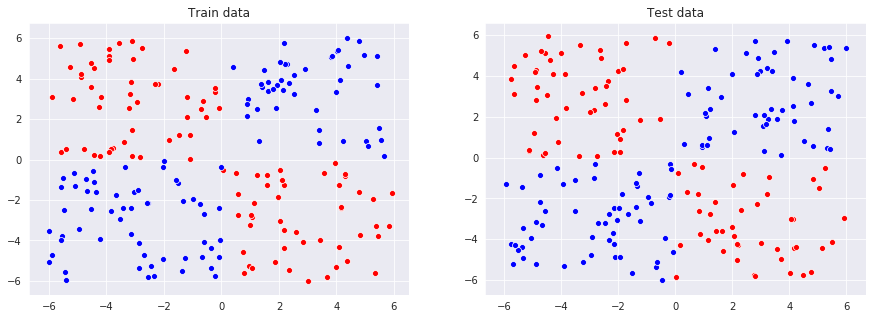

In [4]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

train_data_0 = train_data[train_labels == 0]
train_data_1 = train_data[train_labels == 1]
sns.scatterplot(x=train_data_0[:, 0], y=train_data_0[:, 1], color='red', ax=axes[0])
sns.scatterplot(x=train_data_1[:, 0], y=train_data_1[:, 1], color='blue', ax=axes[0])
axes[0].set_title("Train data")

test_data_0 = test_data[test_labels == 0]
test_data_1 = test_data[test_labels == 1]
sns.scatterplot(x=test_data_0[:, 0], y=test_data_0[:, 1], color='red', ax=axes[1])
sns.scatterplot(x=test_data_1[:, 0], y=test_data_1[:, 1], color='blue', ax=axes[1])
axes[1].set_title("Test data");

### 1.4) Neuronen für die ersten zwei Neuronen.

In [5]:
%%latex
Gewichte der Neuronen im Hidden Layer(Layer 2): 
\begin{align}
    w^{2}_{i1} = \begin{pmatrix} 0 \\ 1 \end{pmatrix}, b^{2}_{1} = 0  \\
    w^{2}_{i2} = \begin{pmatrix} 1 \\ 0 \end{pmatrix}, b^{2}_{2} = 0
\end{align}

<IPython.core.display.Latex object>

### 1.5) Entscheidungsfunktion der ersten zwei Neuronen im 100x100 Gitter

In [6]:
weights = np.asarray([[0.0, 1.0], [1.0, 0.0]])
biases = np.asarray([[0], [0]])
values = np.zeros(shape=(2, 100, 100))

xs = np.linspace(-6.0, 6.0, 100)
ys = np.linspace(-6.0, 6.0, 100)

for i in range(2):
    for xidx, x in enumerate(xs):
        for yidx, y in enumerate(ys):
            values[i, yidx, xidx] = sigmoid(np.dot(weights[i], np.array([x, y])) + biases[i].squeeze())
values = np.asarray(values)

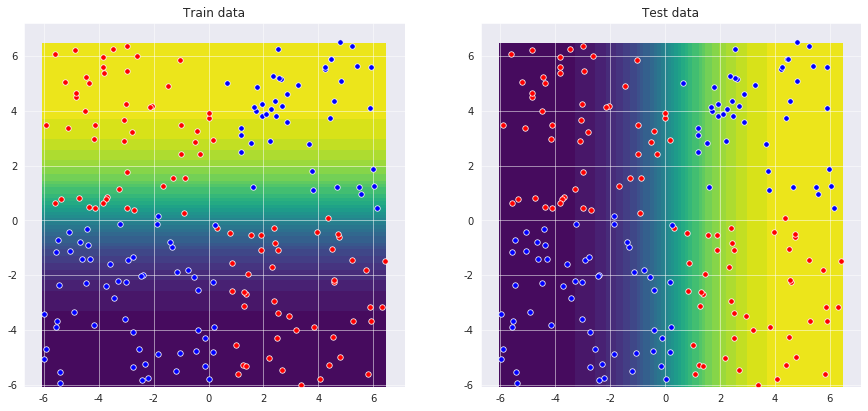

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
palette = sns.color_palette("viridis", 32)
cmap = ListedColormap(sns.color_palette(palette).as_hex())

axes[0].imshow(values[0], interpolation='none', cmap=cmap)
axes[0].grid(color='w', linestyle='-', linewidth=0.5)
axes[0].invert_yaxis()

train_data_0 = train_data[train_labels == 0]
train_data_1 = train_data[train_labels == 1]
train_data_0_plot = (train_data_0 + 6) * (100/12)
train_data_1_plot = (train_data_1 + 6) * (100/12)
sns.scatterplot(x=train_data_0_plot[:, 0], y=train_data_0_plot[:, 1], color='red', ax=axes[0], s=30)
sns.scatterplot(x=train_data_1_plot[:, 0], y=train_data_1_plot[:, 1], color='blue', ax=axes[0], s=30)
axes[0].set_title("Train data")

pos_list = np.arange(0, 100, 16)
value_list = np.arange(-6, 8, 2)
axes[0].xaxis.set_major_locator(ticker.FixedLocator((pos_list)))
axes[0].xaxis.set_major_formatter(ticker.FixedFormatter((value_list)))
axes[0].yaxis.set_major_locator(ticker.FixedLocator((pos_list)))
axes[0].yaxis.set_major_formatter(ticker.FixedFormatter((value_list)))


axes[1].imshow(values[1], interpolation='none', cmap=cmap)
axes[1].grid(color='w', linestyle='-', linewidth=0.5)
axes[1].invert_yaxis()

train_data_0 = train_data[train_labels == 0]
train_data_1 = train_data[train_labels == 1]
train_data_0_plot = (train_data_0 + 6) * (100/12)
train_data_1_plot = (train_data_1 + 6) * (100/12)
sns.scatterplot(x=train_data_0_plot[:, 0], y=train_data_0_plot[:, 1], color='red', ax=axes[1], s=30)
sns.scatterplot(x=train_data_1_plot[:, 0], y=train_data_1_plot[:, 1], color='blue', ax=axes[1], s=30)
axes[1].set_title("Test data")

pos_list = np.arange(0, 100, 16)
value_list = np.arange(-6, 8, 2)
axes[1].xaxis.set_major_locator(ticker.FixedLocator((pos_list)))
axes[1].xaxis.set_major_formatter(ticker.FixedFormatter((value_list)))
axes[1].yaxis.set_major_locator(ticker.FixedLocator((pos_list)))
axes[1].yaxis.set_major_formatter(ticker.FixedFormatter((value_list)))

### 1.6)

In [8]:
def cost(ypred, y):
    if cost_method == "MSE":
        return (ypred - y)**2
    elif cost_method == "LOGREG":
        return -y * np.log(ypred) - ((1 - y) * np.log(1 - ypred))
    else:
        print("Unknown cost function.")
        exit(1)

def cost_derived(output_activations, y):
    if cost_method == "MSE":
        return (output_activations - y)
    elif cost_method == "LOGREG":
        dC = (-1*(output_activations - y)) / ((output_activations - 1) * output_activations)
        dC = np.nan_to_num(dC)
        return dC
    else:
        print("Unknown cost function.")
        exit(1)
    
def activation(z):
    if activation_method == "SIGMOID":
        return 1.0 / (1.0 + np.exp(-z))
    elif activation_method == "RELU":
        return np.maximum(0, z)
    elif activation_method == "TANH":
        return np.tanh(z)
    else:
        print("Unknown activation method.")
        exit(1)

def activation_derived(z):
    if activation_method == "SIGMOID":
        return sigmoid(z) * (1 - sigmoid(z))
    elif activation_method == "RELU":
        z[z <= 0] = 0
        z[z > 0] = 1
        return z
    elif activation_method == "TANH":
        return 1 - (np.tanh(z) * np.tanh(z))
    else:
        print("Unknown activation function.")
        exit(1)
    
def feedforward(a, weights, biases):
    activations = [a]
    zs = []
    for weight, bias in zip(weights, biases):
        z = np.dot(weight, a) + bias
        a = activation(z)
        zs.append(z)
        activations.append(a)
    return np.asarray(activations), np.asarray(zs)

def get_biases_and_weights(layer_dims, fill="zeros", verbose=False):
    
    if fill == "zeros":
        new_biases = np.array([np.zeros(shape=(l, 1)) for l in layer_dims[1:]])
        new_weights = np.array([np.zeros(shape=(l1, l2)) for l1, l2 in zip(layer_dims[1:], layer_dims[:-1])])
    elif fill == "random":
        new_biases = np.array([np.random.rand(l, 1) for l in layer_dims[1:]])
        new_weights = np.array([np.random.rand(l1, l2) for l1, l2 in zip(layer_dims[1:], layer_dims[:-1])])
    else:
        print("Wrong fill type.")
    
    if verbose:
        print("bias dimensions: {}".format(layer_dims[1:]))
        print("weight dimensions: {}, {}".format(layer_dims[1:], layer_dims[:-1]))
        print()

        for i, bias in enumerate(new_biases):
            print("bias layer {}: \n {}".format(i+1, bias))
        print()

        for i, weight in enumerate(new_weights):
            print("weight layer {}: \n {}".format(i+1, weight))
        print()
    
    return new_biases, new_weights

def evaluate(x2, y2, weights, biases): 
    n = x2.shape[0]
    correct = 0
    mse_ = 0
    
    for i in range(0, n):
        x = np.asarray([x2[i]]).T
        y = np.asarray([y2[i]]).T
        ypred = feedforward(x, weights, biases)[0][-1]
        
        c = y[0]
        cpred = 0
        
        if activation_method == "TANH":
            thresh = 0.0
        else:
            thresh = 0.5
            
        if ypred > thresh:
            cpred = 1
        else:
            cpred = 0
            
        if cpred == c:
            correct += 1
            
        mse_ += cost(ypred, y[0])
        
    return correct / n, mse_

def backprop(x, y, weights, biases, layer_dims):
    nabla_b, nabla_w = get_biases_and_weights(layer_dims)
    
    activations, zs = feedforward(x, weights, biases)
    delta = cost_derived(activations[-1], y) * activation_derived(zs[-1])
    
    nabla_b[-1] = delta
    nabla_w[-1] = np.dot(delta, activations[-2].T)
    
    for l in range(2, len(layer_dims)):
        z = zs[-l]
        sp = activation_derived(z)
        t = np.dot(weights[-l+1].transpose(), delta)
        delta = t * sp
        nabla_b[-l] = delta
        nabla_w[-l] = np.dot(delta, activations[-l-1].T)
    
    return (nabla_b, nabla_w)

def update_mini_batch(xmb, ymb, eta, weights, biases, layer_dims):
    nabla_b, nabla_w = get_biases_and_weights(layer_dims)
    
    for i in range(xmb.shape[0]):
        x = np.reshape(xmb[i,:],(xmb.shape[1],1)).copy()
        y = ymb[i].copy()
        
        delta_nabla_b, delta_nabla_w = backprop(x, y, weights, biases, layer_dims)
        
        nabla_b = [nb+dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
        nabla_w = [nw+dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
    
    weights = [w-(eta/xmb.shape[0])*nw for w, nw in zip(weights, nabla_w)]
    biases = [b-(eta/xmb.shape[0])*nb for b, nb in zip(biases, nabla_b)]
    biases[0] = np.asarray([[0], [0]])
    weights[0] = np.asarray([[0.0, 1.0], [1.0, 0.0]])
    
    return (weights, biases)

def SGD(x0, y0, n_epochs, mini_batch_size, eta, x2, y2, split, layer_dims):

    biases, weights = get_biases_and_weights(layer_dims, fill="random")

    accuracys_test = np.zeros(shape=(n_epochs))
    accuracys_train = np.zeros(shape=(n_epochs))
    mses_test = np.zeros(shape=(n_epochs))
    mses_train = np.zeros(shape=(n_epochs))
    
    for epoch in range(n_epochs):
        
        mixer = list(zip(x0, y0))
        random.shuffle(mixer)
        x0, y0 = zip(*mixer)
        x0 = np.asarray(x0)
        y0 = np.asarray(y0)
        
        for k in range(0, x0.shape[0], mini_batch_size):
            xmb = x0[k:k+mini_batch_size,:]
            ymb = y0[k:k+mini_batch_size]
            weights, biases = update_mini_batch(xmb, ymb, eta, weights, biases, layer_dims)
        
        accuracys_test[epoch], mses_test[epoch] = evaluate(x2, y2, weights, biases)
        percent_test = accuracys_test[epoch] * 100
        
        accuracys_train[epoch], mses_train[epoch] = evaluate(x0, y0, weights, biases)
        percent_train = accuracys_train[epoch] * 100
        
        if (epoch % split) == 0:
            print("Epoch: {} / {}, Train-Accuracy: {:.4f}({:.2f}%), Test-Accuracy: {:.4f}({:.2f}%)".format(
                               epoch, n_epochs, 
                               accuracys_train[epoch], percent_train, 
                               accuracys_test[epoch], percent_test))
    
    return accuracys_test, mses_test, accuracys_train, mses_train, biases, weights

## 2. Training eines MLPs auf den Spielzeugdaten

In [9]:
x_range = (-6.0, 6.0)
y_range = (-6.0, 6.0)
num_data = 200
x0, y0 = generate_data(x_range, y_range, num_data)
x2, y2 = generate_data(x_range, y_range, num_data)

mbs = 10
eta = 0.25
n_epochs = 250
layer_dims = [2, 2, 2, 1]
split = 10

global activation_method
global cost_method
activation_method = "SIGMOID"
cost_method = "MSE"

accuracys_test, mses_test, accuracys_train, mses_train, biases, weights = SGD(x0, y0, n_epochs, mbs, eta, x2, y2, split, layer_dims)
print(weights)
print()
print(biases)

Epoch: 0 / 250, Train-Accuracy: 0.5000(50.00%), Test-Accuracy: 0.5000(50.00%)
Epoch: 10 / 250, Train-Accuracy: 0.5750(57.50%), Test-Accuracy: 0.5600(56.00%)
Epoch: 20 / 250, Train-Accuracy: 0.3750(37.50%), Test-Accuracy: 0.3600(36.00%)
Epoch: 30 / 250, Train-Accuracy: 0.5550(55.50%), Test-Accuracy: 0.4900(49.00%)
Epoch: 40 / 250, Train-Accuracy: 0.5900(59.00%), Test-Accuracy: 0.5300(53.00%)
Epoch: 50 / 250, Train-Accuracy: 0.6100(61.00%), Test-Accuracy: 0.5450(54.50%)
Epoch: 60 / 250, Train-Accuracy: 0.6000(60.00%), Test-Accuracy: 0.5500(55.00%)
Epoch: 70 / 250, Train-Accuracy: 0.6150(61.50%), Test-Accuracy: 0.5550(55.50%)
Epoch: 80 / 250, Train-Accuracy: 0.6250(62.50%), Test-Accuracy: 0.5600(56.00%)
Epoch: 90 / 250, Train-Accuracy: 0.6350(63.50%), Test-Accuracy: 0.5800(58.00%)
Epoch: 100 / 250, Train-Accuracy: 0.6350(63.50%), Test-Accuracy: 0.5950(59.50%)
Epoch: 110 / 250, Train-Accuracy: 0.6350(63.50%), Test-Accuracy: 0.5950(59.50%)
Epoch: 120 / 250, Train-Accuracy: 0.6400(64.00%), T

### 2.3) Genauigkeit und MSE von Training und Test Daten

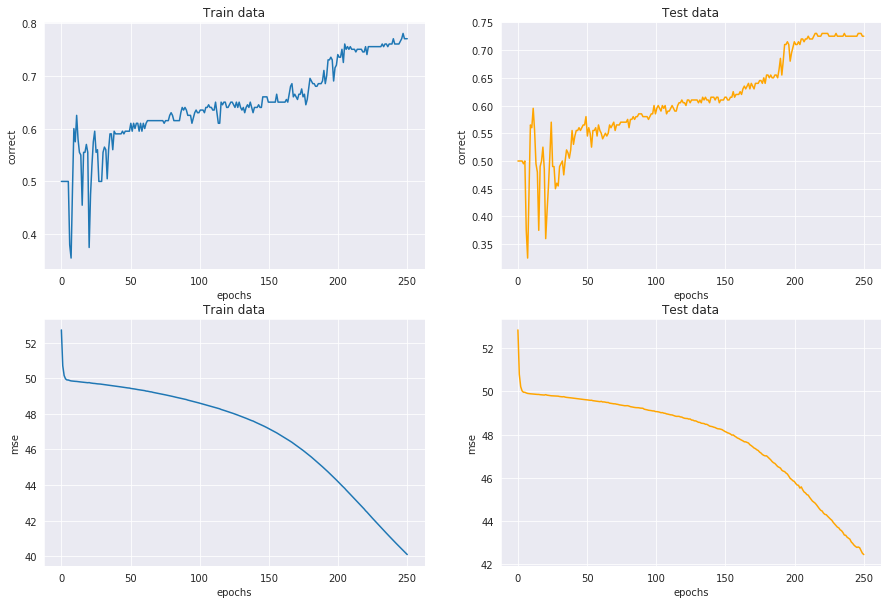

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
sns.lineplot(x=np.linspace(0, len(accuracys_train), n_epochs), y=accuracys_train, ax=axes[0, 0])
axes[0, 0].set_title("Train data")
axes[0, 0].set_xlabel("epochs")
axes[0, 0].set_ylabel("correct")

sns.lineplot(x=np.linspace(0, len(accuracys_test), n_epochs), y=accuracys_test, ax=axes[0, 1], color='orange')
axes[0, 1].set_title("Test data")
axes[0, 1].set_xlabel("epochs")
axes[0, 1].set_ylabel("correct")

sns.lineplot(x=np.linspace(0, len(mses_train), n_epochs), y=mses_train, ax=axes[1, 0])
axes[1, 0].set_title("Train data")
axes[1, 0].set_xlabel("epochs")
axes[1, 0].set_ylabel("mse")

sns.lineplot(x=np.linspace(0, len(mses_test), n_epochs), y=mses_test, ax=axes[1, 1], color='orange')
axes[1, 1].set_title("Test data")
axes[1, 1].set_xlabel("epochs")
axes[1, 1].set_ylabel("mse");

### 2.4) Darstellung des 100x100 Gitters mit trainiertem Modeloutput

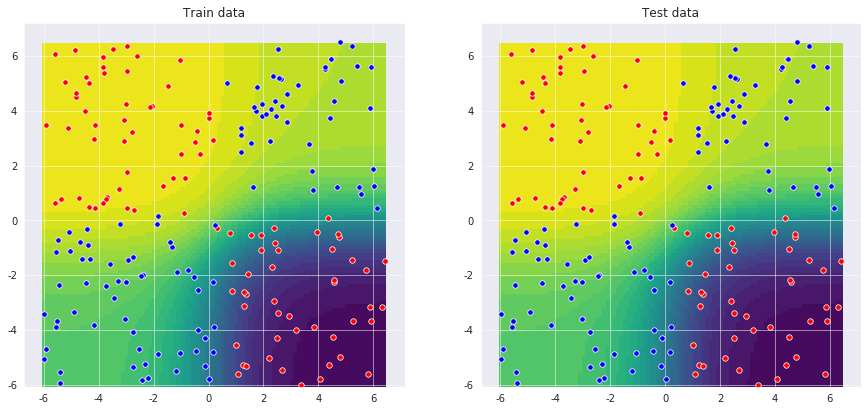

In [11]:
values = np.zeros(shape=(2, 100, 100))

xs = np.linspace(-6.0, 6.0, 100)
ys = np.linspace(-6.0, 6.0, 100)

for i in range(2):
    for xidx, x in enumerate(xs):
        for yidx, y in enumerate(ys):
            values[i, yidx, xidx] = feedforward(np.array([np.array([x, y])]).T, weights, biases)[0][-1]
values = np.asarray(values)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
palette = sns.color_palette("viridis", 32)
cmap = ListedColormap(sns.color_palette(palette).as_hex())

axes[0].imshow(values[0], interpolation='none', cmap=cmap)
axes[0].grid(color='w', linestyle='-', linewidth=0.5)
axes[0].invert_yaxis()

train_data_0 = train_data[train_labels == 0]
train_data_1 = train_data[train_labels == 1]
train_data_0_plot = (train_data_0 + 6) * (100/12)
train_data_1_plot = (train_data_1 + 6) * (100/12)
sns.scatterplot(x=train_data_0_plot[:, 0], y=train_data_0_plot[:, 1], color='red', ax=axes[0], s=30)
sns.scatterplot(x=train_data_1_plot[:, 0], y=train_data_1_plot[:, 1], color='blue', ax=axes[0], s=30)
axes[0].set_title("Train data")

pos_list = np.arange(0, 100, 16)
value_list = np.arange(-6, 8, 2)
axes[0].xaxis.set_major_locator(ticker.FixedLocator((pos_list)))
axes[0].xaxis.set_major_formatter(ticker.FixedFormatter((value_list)))
axes[0].yaxis.set_major_locator(ticker.FixedLocator((pos_list)))
axes[0].yaxis.set_major_formatter(ticker.FixedFormatter((value_list)))


axes[1].imshow(values[1], interpolation='none', cmap=cmap)
axes[1].grid(color='w', linestyle='-', linewidth=0.5)
axes[1].invert_yaxis()

train_data_0 = train_data[train_labels == 0]
train_data_1 = train_data[train_labels == 1]
train_data_0_plot = (train_data_0 + 6) * (100/12)
train_data_1_plot = (train_data_1 + 6) * (100/12)
sns.scatterplot(x=train_data_0_plot[:, 0], y=train_data_0_plot[:, 1], color='red', ax=axes[1], s=30)
sns.scatterplot(x=train_data_1_plot[:, 0], y=train_data_1_plot[:, 1], color='blue', ax=axes[1], s=30)
axes[1].set_title("Test data")

pos_list = np.arange(0, 100, 16)
value_list = np.arange(-6, 8, 2)
axes[1].xaxis.set_major_locator(ticker.FixedLocator((pos_list)))
axes[1].xaxis.set_major_formatter(ticker.FixedFormatter((value_list)))
axes[1].yaxis.set_major_locator(ticker.FixedLocator((pos_list)))
axes[1].yaxis.set_major_formatter(ticker.FixedFormatter((value_list)))

## 3) Nachvollziehen der Beispiele aus der Vorlesung

In [12]:
x_range = (-6.0, 6.0)
y_range = (-6.0, 6.0)
num_data = 200
x0, y0 = generate_data(x_range, y_range, num_data)
x2, y2 = generate_data(x_range, y_range, num_data)

mbs = 10
eta = 0.25
n_epochs = 250
layer_dims = [2, 2, 2, 1]
split = 10

global activation_method
global cost_method
activation_method = "TANH"
cost_method = "MSE"

accuracys_test, mses_test, accuracys_train, mses_train, biases, weights = SGD(x0, y0, n_epochs, mbs, eta, x2, y2, split, layer_dims)

Epoch: 0 / 250, Train-Accuracy: 0.4500(45.00%), Test-Accuracy: 0.4750(47.50%)
Epoch: 10 / 250, Train-Accuracy: 0.4500(45.00%), Test-Accuracy: 0.4750(47.50%)
Epoch: 20 / 250, Train-Accuracy: 0.4750(47.50%), Test-Accuracy: 0.5150(51.50%)
Epoch: 30 / 250, Train-Accuracy: 0.6600(66.00%), Test-Accuracy: 0.6350(63.50%)
Epoch: 40 / 250, Train-Accuracy: 0.4500(45.00%), Test-Accuracy: 0.4750(47.50%)
Epoch: 50 / 250, Train-Accuracy: 0.6200(62.00%), Test-Accuracy: 0.6100(61.00%)
Epoch: 60 / 250, Train-Accuracy: 0.4500(45.00%), Test-Accuracy: 0.4750(47.50%)
Epoch: 70 / 250, Train-Accuracy: 0.5000(50.00%), Test-Accuracy: 0.5500(55.00%)
Epoch: 80 / 250, Train-Accuracy: 0.7950(79.50%), Test-Accuracy: 0.8500(85.00%)
Epoch: 90 / 250, Train-Accuracy: 0.8700(87.00%), Test-Accuracy: 0.9100(91.00%)
Epoch: 100 / 250, Train-Accuracy: 0.8300(83.00%), Test-Accuracy: 0.8650(86.50%)
Epoch: 110 / 250, Train-Accuracy: 0.6100(61.00%), Test-Accuracy: 0.6800(68.00%)
Epoch: 120 / 250, Train-Accuracy: 0.8200(82.00%), T

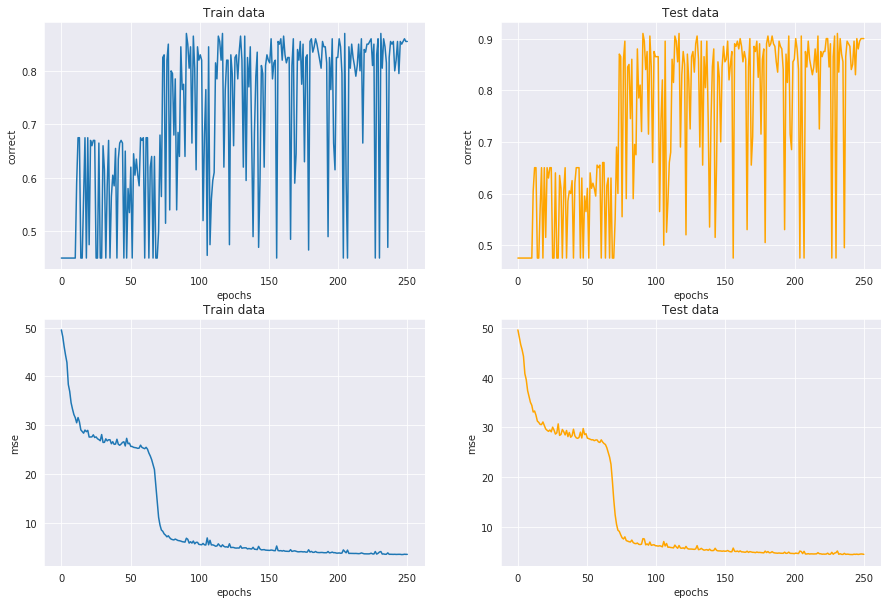

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
sns.lineplot(x=np.linspace(0, len(accuracys_train), n_epochs), y=accuracys_train, ax=axes[0, 0])
axes[0, 0].set_title("Train data")
axes[0, 0].set_xlabel("epochs")
axes[0, 0].set_ylabel("correct")

sns.lineplot(x=np.linspace(0, len(accuracys_test), n_epochs), y=accuracys_test, ax=axes[0, 1], color='orange')
axes[0, 1].set_title("Test data")
axes[0, 1].set_xlabel("epochs")
axes[0, 1].set_ylabel("correct")

sns.lineplot(x=np.linspace(0, len(mses_train), n_epochs), y=mses_train, ax=axes[1, 0])
axes[1, 0].set_title("Train data")
axes[1, 0].set_xlabel("epochs")
axes[1, 0].set_ylabel("mse")

sns.lineplot(x=np.linspace(0, len(mses_test), n_epochs), y=mses_test, ax=axes[1, 1], color='orange')
axes[1, 1].set_title("Test data")
axes[1, 1].set_xlabel("epochs")
axes[1, 1].set_ylabel("mse");

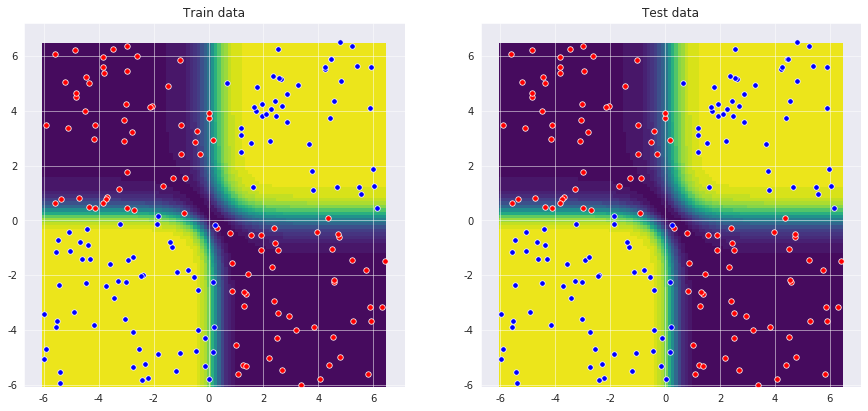

In [14]:
values = np.zeros(shape=(2, 100, 100))

xs = np.linspace(-6.0, 6.0, 100)
ys = np.linspace(-6.0, 6.0, 100)

for i in range(2):
    for xidx, x in enumerate(xs):
        for yidx, y in enumerate(ys):
            values[i, yidx, xidx] = feedforward(np.array([np.array([x, y])]).T, weights, biases)[0][-1]
values = np.asarray(values)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
palette = sns.color_palette("viridis", 32)
cmap = ListedColormap(sns.color_palette(palette).as_hex())

axes[0].imshow(values[0], interpolation='none', cmap=cmap)
axes[0].grid(color='w', linestyle='-', linewidth=0.5)
axes[0].invert_yaxis()

train_data_0 = train_data[train_labels == 0]
train_data_1 = train_data[train_labels == 1]
train_data_0_plot = (train_data_0 + 6) * (100/12)
train_data_1_plot = (train_data_1 + 6) * (100/12)
sns.scatterplot(x=train_data_0_plot[:, 0], y=train_data_0_plot[:, 1], color='red', ax=axes[0], s=30)
sns.scatterplot(x=train_data_1_plot[:, 0], y=train_data_1_plot[:, 1], color='blue', ax=axes[0], s=30)
axes[0].set_title("Train data")

pos_list = np.arange(0, 100, 16)
value_list = np.arange(-6, 8, 2)
axes[0].xaxis.set_major_locator(ticker.FixedLocator((pos_list)))
axes[0].xaxis.set_major_formatter(ticker.FixedFormatter((value_list)))
axes[0].yaxis.set_major_locator(ticker.FixedLocator((pos_list)))
axes[0].yaxis.set_major_formatter(ticker.FixedFormatter((value_list)))


axes[1].imshow(values[1], interpolation='none', cmap=cmap)
axes[1].grid(color='w', linestyle='-', linewidth=0.5)
axes[1].invert_yaxis()

train_data_0 = train_data[train_labels == 0]
train_data_1 = train_data[train_labels == 1]
train_data_0_plot = (train_data_0 + 6) * (100/12)
train_data_1_plot = (train_data_1 + 6) * (100/12)
sns.scatterplot(x=train_data_0_plot[:, 0], y=train_data_0_plot[:, 1], color='red', ax=axes[1], s=30)
sns.scatterplot(x=train_data_1_plot[:, 0], y=train_data_1_plot[:, 1], color='blue', ax=axes[1], s=30)
axes[1].set_title("Test data")

pos_list = np.arange(0, 100, 16)
value_list = np.arange(-6, 8, 2)
axes[1].xaxis.set_major_locator(ticker.FixedLocator((pos_list)))
axes[1].xaxis.set_major_formatter(ticker.FixedFormatter((value_list)))
axes[1].yaxis.set_major_locator(ticker.FixedLocator((pos_list)))
axes[1].yaxis.set_major_formatter(ticker.FixedFormatter((value_list)))

## 4) Logistische Regression

In [15]:
x_range = (-6.0, 6.0)
y_range = (-6.0, 6.0)
num_data = 200
x0, y0 = generate_data(x_range, y_range, num_data)
x2, y2 = generate_data(x_range, y_range, num_data)

mbs = 10
eta = 0.25
n_epochs = 250
layer_dims = [2, 2, 2, 1]
split = 10

global activation_method
global cost_method
activation_method = "SIGMOID"
cost_method = "LOGREG"

accuracys_test, mses_test, accuracys_train, mses_train, biases, weights = SGD(x0, y0, n_epochs, mbs, eta, x2, y2, split, layer_dims)

Epoch: 0 / 250, Train-Accuracy: 0.5350(53.50%), Test-Accuracy: 0.4650(46.50%)
Epoch: 10 / 250, Train-Accuracy: 0.5350(53.50%), Test-Accuracy: 0.4650(46.50%)
Epoch: 20 / 250, Train-Accuracy: 0.5350(53.50%), Test-Accuracy: 0.4650(46.50%)
Epoch: 30 / 250, Train-Accuracy: 0.5350(53.50%), Test-Accuracy: 0.4650(46.50%)
Epoch: 40 / 250, Train-Accuracy: 0.5350(53.50%), Test-Accuracy: 0.4650(46.50%)
Epoch: 50 / 250, Train-Accuracy: 0.5350(53.50%), Test-Accuracy: 0.4650(46.50%)
Epoch: 60 / 250, Train-Accuracy: 0.4650(46.50%), Test-Accuracy: 0.5350(53.50%)
Epoch: 70 / 250, Train-Accuracy: 0.5350(53.50%), Test-Accuracy: 0.4650(46.50%)
Epoch: 80 / 250, Train-Accuracy: 0.4800(48.00%), Test-Accuracy: 0.5050(50.50%)
Epoch: 90 / 250, Train-Accuracy: 0.7400(74.00%), Test-Accuracy: 0.7200(72.00%)
Epoch: 100 / 250, Train-Accuracy: 0.7450(74.50%), Test-Accuracy: 0.7300(73.00%)
Epoch: 110 / 250, Train-Accuracy: 0.7300(73.00%), Test-Accuracy: 0.7350(73.50%)
Epoch: 120 / 250, Train-Accuracy: 0.7550(75.50%), T

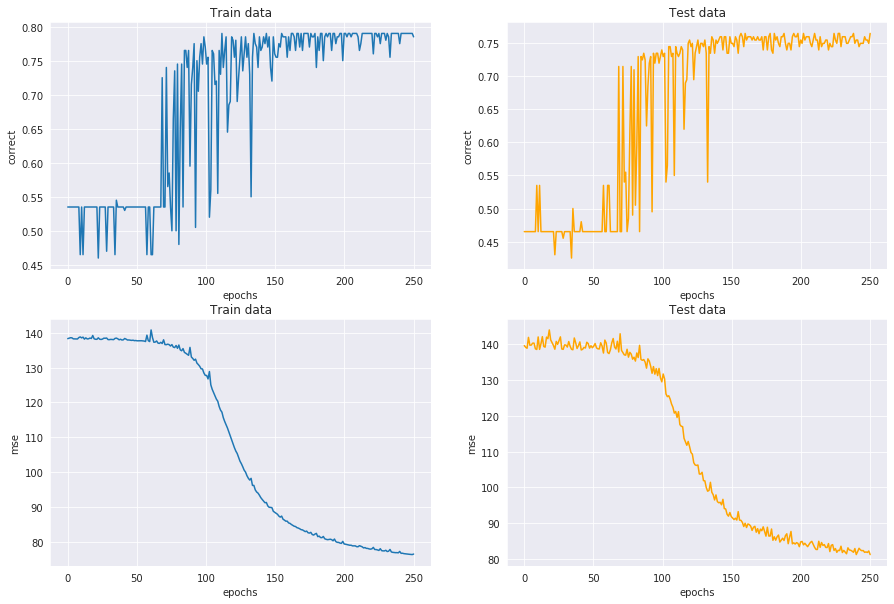

In [16]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
sns.lineplot(x=np.linspace(0, len(accuracys_train), n_epochs), y=accuracys_train, ax=axes[0, 0])
axes[0, 0].set_title("Train data")
axes[0, 0].set_xlabel("epochs")
axes[0, 0].set_ylabel("correct")

sns.lineplot(x=np.linspace(0, len(accuracys_test), n_epochs), y=accuracys_test, ax=axes[0, 1], color='orange')
axes[0, 1].set_title("Test data")
axes[0, 1].set_xlabel("epochs")
axes[0, 1].set_ylabel("correct")

sns.lineplot(x=np.linspace(0, len(mses_train), n_epochs), y=mses_train, ax=axes[1, 0])
axes[1, 0].set_title("Train data")
axes[1, 0].set_xlabel("epochs")
axes[1, 0].set_ylabel("mse")

sns.lineplot(x=np.linspace(0, len(mses_test), n_epochs), y=mses_test, ax=axes[1, 1], color='orange')
axes[1, 1].set_title("Test data")
axes[1, 1].set_xlabel("epochs")
axes[1, 1].set_ylabel("mse");

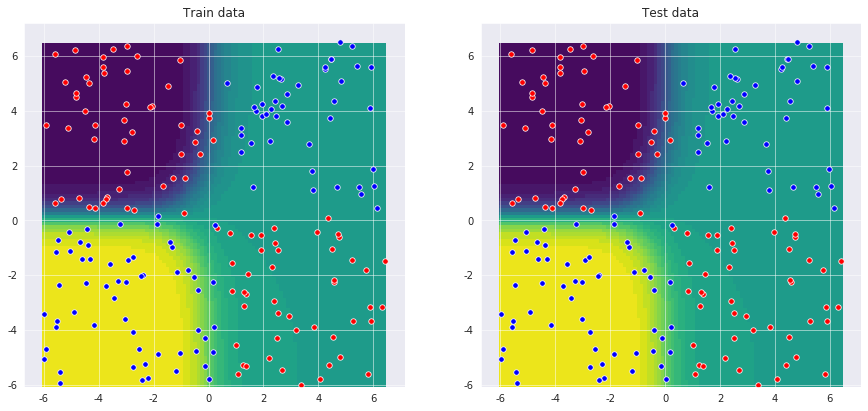

In [17]:
values = np.zeros(shape=(2, 100, 100))

xs = np.linspace(-6.0, 6.0, 100)
ys = np.linspace(-6.0, 6.0, 100)

for i in range(2):
    for xidx, x in enumerate(xs):
        for yidx, y in enumerate(ys):
            values[i, yidx, xidx] = feedforward(np.array([np.array([x, y])]).T, weights, biases)[0][-1]
values = np.asarray(values)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
palette = sns.color_palette("viridis", 32)
cmap = ListedColormap(sns.color_palette(palette).as_hex())

axes[0].imshow(values[0], interpolation='none', cmap=cmap)
axes[0].grid(color='w', linestyle='-', linewidth=0.5)
axes[0].invert_yaxis()

train_data_0 = train_data[train_labels == 0]
train_data_1 = train_data[train_labels == 1]
train_data_0_plot = (train_data_0 + 6) * (100/12)
train_data_1_plot = (train_data_1 + 6) * (100/12)
sns.scatterplot(x=train_data_0_plot[:, 0], y=train_data_0_plot[:, 1], color='red', ax=axes[0], s=30)
sns.scatterplot(x=train_data_1_plot[:, 0], y=train_data_1_plot[:, 1], color='blue', ax=axes[0], s=30)
axes[0].set_title("Train data")

pos_list = np.arange(0, 100, 16)
value_list = np.arange(-6, 8, 2)
axes[0].xaxis.set_major_locator(ticker.FixedLocator((pos_list)))
axes[0].xaxis.set_major_formatter(ticker.FixedFormatter((value_list)))
axes[0].yaxis.set_major_locator(ticker.FixedLocator((pos_list)))
axes[0].yaxis.set_major_formatter(ticker.FixedFormatter((value_list)))


axes[1].imshow(values[1], interpolation='none', cmap=cmap)
axes[1].grid(color='w', linestyle='-', linewidth=0.5)
axes[1].invert_yaxis()

train_data_0 = train_data[train_labels == 0]
train_data_1 = train_data[train_labels == 1]
train_data_0_plot = (train_data_0 + 6) * (100/12)
train_data_1_plot = (train_data_1 + 6) * (100/12)
sns.scatterplot(x=train_data_0_plot[:, 0], y=train_data_0_plot[:, 1], color='red', ax=axes[1], s=30)
sns.scatterplot(x=train_data_1_plot[:, 0], y=train_data_1_plot[:, 1], color='blue', ax=axes[1], s=30)
axes[1].set_title("Test data")

pos_list = np.arange(0, 100, 16)
value_list = np.arange(-6, 8, 2)
axes[1].xaxis.set_major_locator(ticker.FixedLocator((pos_list)))
axes[1].xaxis.set_major_formatter(ticker.FixedFormatter((value_list)))
axes[1].yaxis.set_major_locator(ticker.FixedLocator((pos_list)))
axes[1].yaxis.set_major_formatter(ticker.FixedFormatter((value_list)))

In [52]:
def perzeptron(x):
    weights = np.asarray([[0.0, 1.0], [1.0, 0.0]])
    biases = np.asarray([[0], [0]])
    
    x0 = [[sigmoid((weights[0] @ x[i]) + biases[0]), sigmoid((weights[1] @ x[i]) + biases[1])] for i in range(len(x))]
    
    x0 = np.asarray(x0)
    
    return x0

def evaluate(x2, y2, weights, biases): 
    n = x2.shape[0]
    correct = 0
    mse_ = 0
    
    for i in range(0, n):
        x = np.asarray([x2[i]]).T
        y = np.asarray([y2[i]]).T
        activations = feedforward(x, weights, biases)
        ypred = activations[0][-1]
        
        c = y[0]
        cpred = 0
        
        print(activations)
        
        if activation_method == "TANH":
            thresh = 0.0
        else:
            thresh = 0.5
            
        if ypred > thresh:
            cpred = 1
        else:
            cpred = 0
            
        if cpred == c:
            correct += 1
            
        mse_ += cost(ypred, y[0])
        
    return correct / n, mse_

In [53]:
x_range = (-6.0, 6.0)
y_range = (-6.0, 6.0)
num_data = 200
x0, y0 = generate_data(x_range, y_range, num_data)
x2, y2 = generate_data(x_range, y_range, num_data)
#x0 = perzeptron(x0)
#x2 = perzeptron(x2)

mbs = 10
eta = 0.25
n_epochs = 250
layer_dims = [2, 2, 2, 1]
split = 10

global activation_method
global cost_method
activation_method = "SIGMOID"
cost_method = "MSE"

accuracys_test, mses_test, accuracys_train, mses_train, biases, weights = SGD(x0, y0, n_epochs, mbs, eta, x2, y2, split, layer_dims)

(array([array([[-4.04445431],
       [-3.69776497]]), array([[0.0241797 ],
       [0.01721762]]), array([[0.54062165],
       [0.53442373]]), array([[0.64228241]])], dtype=object), array([array([[-3.69776497],
       [-4.04445431]]), array([[0.16284552],
       [0.13791309]]), array([[0.58528428]])], dtype=object))
(array([array([[-4.48791808],
       [ 3.57719875]]), array([[0.97280628],
       [0.01111901]]), array([[0.64255676],
       [0.56736108]]), array([[0.6617593]])], dtype=object), array([array([[ 3.57719875],
       [-4.48791808]]), array([[0.58647856],
       [0.27109245]]), array([[0.67114411]])], dtype=object))
(array([array([[4.40990033],
       [2.10301467]]), array([[0.89119584],
       [0.98798961]]), array([[0.65959517],
       [0.70377662]]), array([[0.67468694]])], dtype=object), array([array([[2.10301467],
       [4.40990033]]), array([[0.66149069],
       [0.86534716]]), array([[0.7294608]])], dtype=object))
(array([array([[0.15417574],
       [2.8885629 ]]), arr

       [0.72672767]]), array([[0.65031175]])], dtype=object))
(array([array([[4.90032606],
       [5.11561484]]), array([[0.99403353],
       [0.99261085]]), array([[0.66996316],
       [0.70745631]]), array([[0.67662497]])], dtype=object), array([array([[5.11561484],
       [4.90032606]]), array([[0.70801846],
       [0.88306183]]), array([[0.73830444]])], dtype=object))
(array([array([[2.56335482],
       [5.52834656]]), array([[0.99604317],
       [0.9284656 ]]), array([[0.66854125],
       [0.69921386]]), array([[0.67579043]])], dtype=object), array([array([[5.52834656],
       [2.56335482]]), array([[0.70159472],
       [0.84355712]]), array([[0.73449289]])], dtype=object))
(array([array([[-1.3612407 ],
       [ 3.21750711]]), array([[0.96148781],
       [0.20403873]]), array([[0.64644269],
       [0.59607641]]), array([[0.66455049]])], dtype=object), array([array([[ 3.21750711],
       [-1.3612407 ]]), array([[0.60343897],
       [0.38914314]]), array([[0.68363938]])], dtype=obje

       [0.75785088]]), array([[0.7081143]])], dtype=object))
(array([array([[-1.48995669],
       [-3.43519266]]), array([[0.03121353],
       [0.18392823]]), array([[0.54612427],
       [0.5602936 ]]), array([[0.64520094]])], dtype=object), array([array([[-3.43519266],
       [-1.48995669]]), array([[0.18502309],
       [0.24235369]]), array([[0.59801021]])], dtype=object))
(array([array([[ 2.53595649],
       [-4.85482562]]), array([[0.00773047],
       [0.92662438]]), array([[0.56446503],
       [0.66812615]]), array([[0.65648818]])], dtype=object), array([array([[-4.85482562],
       [ 2.53595649]]), array([[0.25930332],
       [0.6997221 ]]), array([[0.64768315]])], dtype=object))
(array([array([[1.10711183],
       [2.17604621]]), array([[0.89807773],
       [0.75159028]]), array([[0.65420672],
       [0.67253693]]), array([[0.67150839]])], dtype=object), array([array([[2.17604621],
       [1.10711183]]), array([[0.63758224],
       [0.71968174]]), array([[0.71501522]])], dtype=o

(array([array([[-0.22306773],
       [-1.62321234]]), array([[0.16476233],
       [0.44446317]]), array([[0.56272262],
       [0.60189895]]), array([[0.61077607]])], dtype=object), array([array([[-1.62321234],
       [-0.22306773]]), array([[0.25221908],
       [0.41338372]]), array([[0.45057555]])], dtype=object))
(array([array([[4.16346471],
       [1.69775489]]), array([[0.84524128],
       [0.98468463]]), array([[0.64700328],
       [0.69868394]]), array([[0.63032606]])], dtype=object), array([array([[1.69775489],
       [4.16346471]]), array([[0.60589258],
       [0.84103874]]), array([[0.53361588]])], dtype=object))
(array([array([[ 2.93900134],
       [-1.72321138]]), array([[0.15145798],
       [0.94974108]]), array([[0.57454044],
       [0.67340032]]), array([[0.61729616]])], dtype=object), array([array([[-1.72321138],
       [ 2.93900134]]), array([[0.3004006 ],
       [0.72360476]]), array([[0.4780875]])], dtype=object))
(array([array([[ 5.22517419],
       [-4.87546035]]), 

(array([array([[ 1.19455105],
       [-0.72362657]]), array([[0.32659489],
       [0.76755403]]), array([[0.58834232],
       [0.65368641]]), array([[0.61820701]])], dtype=object), array([array([[-0.72362657],
       [ 1.19455105]]), array([[0.35711684],
       [0.63528306]]), array([[0.48194483]])], dtype=object))
(array([array([[-1.88262084],
       [-2.65937465]]), array([[0.06541355],
       [0.13208813]]), array([[0.54379822],
       [0.5515005 ]]), array([[0.60445854]])], dtype=object), array([array([[-2.65937465],
       [-1.88262084]]), array([[0.17564306],
       [0.20673519]]), array([[0.42407748]])], dtype=object))
(array([array([[-3.00932948],
       [-0.6055574 ]]), array([[0.35307328],
       [0.04700617]]), array([[0.57240556],
       [0.54833152]]), array([[0.60883008]])], dtype=object), array([array([[-0.6055574 ],
       [-3.00932948]]), array([[0.29167258],
       [0.19393163]]), array([[0.44239715]])], dtype=object))
(array([array([[-4.90381691],
       [ 1.02844579

       [0.12640929]]), array([[0.30031375]])], dtype=object))
(array([array([[-0.92531406],
       [ 3.62515597]]), array([[0.97404659],
       [0.28387636]]), array([[0.63801332],
       [0.60283445]]), array([[0.59439118]])], dtype=object), array([array([[ 3.62515597],
       [-0.92531406]]), array([[0.56675176],
       [0.41728941]]), array([[0.38214848]])], dtype=object))
(array([array([[-2.46828616],
       [-2.48968447]]), array([[0.07658451],
       [0.07811156]]), array([[0.5406987 ],
       [0.54244463]]), array([[0.57613618]])], dtype=object), array([array([[-2.48968447],
       [-2.46828616]]), array([[0.16315575],
       [0.17018812]]), array([[0.30693181]])], dtype=object))
(array([array([[-2.31938185],
       [-2.97829818]]), array([[0.04841597],
       [0.08953044]]), array([[0.53800742],
       [0.54325388]]), array([[0.57576926]])], dtype=object), array([array([[-2.97829818],
       [-2.31938185]]), array([[0.15232352],
       [0.17344905]]), array([[0.30542947]])], dt

(array([array([[ 3.88275578],
       [-4.56038784]]), array([[0.01034976],
       [0.97982156]]), array([[0.55663191],
       [0.67194175]]), array([[0.58591935]])], dtype=object), array([array([[-4.56038784],
       [ 3.88275578]]), array([[0.22750385],
       [0.71698049]]), array([[0.34712138]])], dtype=object))
(array([array([[2.94104727],
       [2.21814654]]), array([[0.90186728],
       [0.94983865]]), array([[0.64665388],
       [0.69381322]]), array([[0.6007952]])], dtype=object), array([array([[2.21814654],
       [2.94104727]]), array([[0.6043631 ],
       [0.81800749]]), array([[0.40877952]])], dtype=object))
(array([array([[ 3.62770291],
       [-0.22924392]]), array([[0.4429387 ],
       [0.97411089]]), array([[0.60139325],
       [0.68383401]]), array([[0.59339462]])], dtype=object), array([array([[-0.22924392],
       [ 3.62770291]]), array([[0.41127372],
       [0.77144784]]), array([[0.37801651]])], dtype=object))
(array([array([[-2.91652739],
       [ 5.15916422]]), 

       [0.42552895]]), array([[0.32690365]])], dtype=object))
(array([array([[ 3.07079178],
       [-5.14875065]]), array([[0.00577313],
       [0.95567173]]), array([[0.55553839],
       [0.66851691]]), array([[0.58555896]])], dtype=object), array([array([[-5.14875065],
       [ 3.07079178]]), array([[0.22307405],
       [0.70148489]]), array([[0.34563618]])], dtype=object))
(array([array([[ 3.70245301],
       [-4.05763407]]), array([[0.01699602],
       [0.97593067]]), array([[0.55723226],
       [0.67160951]]), array([[0.58599208]])], dtype=object), array([array([[-4.05763407],
       [ 3.70245301]]), array([[0.22993681],
       [0.71547366]]), array([[0.34742116]])], dtype=object))
(array([array([[-4.70968192],
       [-1.57327849]]), array([[0.17174952],
       [0.00892723]]), array([[0.54899459],
       [0.53502014]]), array([[0.57698629]])], dtype=object), array([array([[-1.57327849],
       [-4.70968192]]), array([[0.19660926],
       [0.14031031]]), array([[0.31041391]])], dt

       [0.16486536]]), array([[0.22105005]])], dtype=object))
(array([array([[-4.60129051],
       [-3.93925611]]), array([[0.01909112],
       [0.00993909]]), array([[0.53103256],
       [0.52936989]]), array([[0.55436402]])], dtype=object), array([array([[-3.93925611],
       [-4.60129051]]), array([[0.12428999],
       [0.11761496]]), array([[0.21831914]])], dtype=object))
(array([array([[-0.61965296],
       [-0.20486741]]), array([[0.44896153],
       [0.34986038]]), array([[0.58384956],
       [0.59461841]]), array([[0.56543004]])], dtype=object), array([array([[-0.20486741],
       [-0.61965296]]), array([[0.3385965 ],
       [0.38309104]]), array([[0.26322962]])], dtype=object))
(array([array([[ 2.71975733],
       [-2.17922827]]), array([[0.10163137],
       [0.93818246]]), array([[0.56264554],
       [0.66812864]]), array([[0.56600761]])], dtype=object), array([array([[-2.17922827],
       [ 2.71975733]]), array([[0.25190586],
       [0.69973328]]), array([[0.26558052]])], dt

(array([array([[-2.00155946],
       [ 2.94225182]]), array([[0.94989601],
       [0.11903929]]), array([[0.62843637],
       [0.57605203]]), array([[0.57103805]])], dtype=object), array([array([[ 2.94225182],
       [-2.00155946]]), array([[0.52551467],
       [0.30658725]]), array([[0.28608762]])], dtype=object))
(array([array([[3.8743005],
       [3.645709 ]]), array([[0.97456113],
       [0.97965371]]), array([[0.65069304],
       [0.6983613 ]]), array([[0.58039461]])], dtype=object), array([array([[3.645709 ],
       [3.8743005]]), array([[0.62208694],
       [0.83950663]]), array([[0.32439353]])], dtype=object))
(array([array([[-3.3282573 ],
       [-1.01714973]]), array([[0.26558297],
       [0.03461442]]), array([[0.55727701],
       [0.54117228]]), array([[0.55883125]])], dtype=object), array([array([[-1.01714973],
       [-3.3282573 ]]), array([[0.23011819],
       [0.16506286]]), array([[0.23642011]])], dtype=object))
(array([array([[ 3.34807866],
       [-5.64523714]]), arr

(array([array([[-5.33222409],
       [ 5.83988839]]), array([[0.99709927],
       [0.00481006]]), array([[0.62835293],
       [0.55938998]]), array([[0.55936325]])], dtype=object), array([array([[ 5.83988839],
       [-5.33222409]]), array([[0.52515734],
       [0.23868669]]), array([[0.23857823]])], dtype=object))
(array([array([[-4.04451881],
       [-3.47824829]]), array([[0.02993751],
       [0.01721653]]), array([[0.53137455],
       [0.53044987]]), array([[0.54407285]])], dtype=object), array([array([[-3.47824829],
       [-4.04451881]]), array([[0.1256633],
       [0.1219504]]), array([[0.1767501]])], dtype=object))
(array([array([[-0.92531406],
       [ 3.62515597]]), array([[0.97404659],
       [0.28387636]]), array([[0.63259088],
       [0.60047041]]), array([[0.5618909]])], dtype=object), array([array([[ 3.62515597],
       [-0.92531406]]), array([[0.54334791],
       [0.40742554]]), array([[0.24883975]])], dtype=object))
(array([array([[-2.46828616],
       [-2.48968447]]),

       [0.11407841]]), array([[0.17517788]])], dtype=object))
(array([array([[0.60138322],
       [1.08024022]]), array([[0.74653944],
       [0.6459727 ]]), array([[0.61894678],
       [0.64587582]]), array([[0.56206204]])], dtype=object), array([array([[1.08024022],
       [0.60138322]]), array([[0.48508022],
       [0.60095962]]), array([[0.24953499]])], dtype=object))
(array([array([[-5.47061869],
       [-1.24432553]]), array([[0.22368396],
       [0.00419099]]), array([[0.55098321],
       [0.53465694]]), array([[0.5470948]])], dtype=object), array([array([[-1.24432553],
       [-5.47061869]]), array([[0.20464404],
       [0.13885041]]), array([[0.18893928]])], dtype=object))
(array([array([[1.92930039],
       [2.9410278 ]]), array([[0.94983772],
       [0.87317196]]), array([[0.64380084],
       [0.68284838]]), array([[0.56733647]])], dtype=object), array([array([[2.9410278 ],
       [1.92930039]]), array([[0.59189943],
       [0.76689287]]), array([[0.27099218]])], dtype=objec

       [0.15643332]]), array([[0.15702358]])], dtype=object))
(array([array([[ 5.77901829],
       [-3.58897445]]), array([[0.02688394],
       [0.99691778]]), array([[0.55438965],
       [0.67328466]]), array([[0.54551223]])], dtype=object), array([array([[-3.58897445],
       [ 5.77901829]]), array([[0.21842287],
       [0.72307895]]), array([[0.18255423]])], dtype=object))
(array([array([[ 1.63410849],
       [-1.07216443]]), array([[0.25499169],
       [0.83673168]]), array([[0.57347749],
       [0.65777422]]), array([[0.54750911]])], dtype=object), array([array([[-1.07216443],
       [ 1.63410849]]), array([[0.29605354],
       [0.65339104]]), array([[0.19061147]])], dtype=object))
(array([array([[-5.58543042],
       [ 4.05823194]]), array([[0.98301397],
       [0.00373811]]), array([[0.62526338],
       [0.55799454]]), array([[0.55036762]])], dtype=object), array([array([[ 4.05823194],
       [-5.58543042]]), array([[0.51194955],
       [0.23302693]]), array([[0.20215614]])], dt

       [0.83446   ]]), array([[0.23852547]])], dtype=object))
(array([array([[-2.68851718],
       [ 5.10397538]]), array([[0.9939641 ],
       [0.06365434]]), array([[0.62770231],
       [0.56740588]]), array([[0.55112628]])], dtype=object), array([array([[ 5.10397538],
       [-2.68851718]]), array([[0.52237223],
       [0.27127496]]), array([[0.20522238]])], dtype=object))
(array([array([[4.47213443],
       [2.7569606 ]]), array([[0.94030526],
       [0.9887061 ]]), array([[0.6438242 ],
       [0.69711721]]), array([[0.55911175]])], dtype=object), array([array([[2.7569606 ],
       [4.47213443]]), array([[0.59200127],
       [0.83360767]]), array([[0.23755793]])], dtype=object))
(array([array([[-2.31332763],
       [-4.47022405]]), array([[0.01131525],
       [0.09002517]]), array([[0.53051641],
       [0.5406994 ]]), array([[0.53626296]])], dtype=object), array([array([[-4.47022405],
       [-2.31332763]]), array([[0.12221756],
       [0.16315858]]), array([[0.14530697]])], dtype=

(array([array([[ 3.34807866],
       [-5.64523714]]), array([[0.00352186],
       [0.96604186]]), array([[0.55126648],
       [0.66843758]]), array([[0.54485799]])], dtype=object), array([array([[-5.64523714],
       [ 3.34807866]]), array([[0.20578913],
       [0.70112692]]), array([[0.17991571]])], dtype=object))
(array([array([[3.69638802],
       [5.6587689 ]]), array([[0.99652531],
       [0.97578779]]), array([[0.6487992 ],
       [0.69694111]]), array([[0.55979969]])], dtype=object), array([array([[5.6587689 ],
       [3.69638802]]), array([[0.61376515],
       [0.83277376]]), array([[0.24034916]])], dtype=object))
(array([array([[-5.49743414],
       [ 1.32644634]]), array([[0.79025221],
       [0.00408055]]), array([[0.60658375],
       [0.55202262]]), array([[0.54747905]])], dtype=object), array([array([[ 1.32644634],
       [-5.49743414]]), array([[0.43297457],
       [0.20884628]]), array([[0.19049013]])], dtype=object))
(array([array([[-3.00932948],
       [-0.6055574 ]]),

KeyboardInterrupt: 